In [430]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/amaydixit11/Academics/refs/heads/main/DSL251/HomeWork2/DIstanceTimeDataset%20-%20StudentsHomeTownDistance.csv')
data.head()

,Location Name,Time to Reach (hr),Distance (km),Train Only,Road Only,Train+Road
0,surat,18.0,1020.0,1.0,0.0,0.0
1,Kolkata,18.0,870.0,0.0,0.0,1.0
2,Hyderabad,13.5,676.0,0.0,0.0,1.0
3,Hyderabad,13.5,680.0,0.0,0.0,1.0
4,Delhi,18.0,977.0,1.0,0.0,0.0


In [431]:
# null values
data.isnull().sum()

,0
Location Name,2
Time to Reach (hr),3
Distance (km),3
Train Only,3
Road Only,3
Train+Road,3


In [432]:
data.dropna(inplace=True)
data.isnull().sum()

,0
Location Name,0
Time to Reach (hr),0
Distance (km),0
Train Only,0
Road Only,0
Train+Road,0


In [433]:
data.describe()

,Time to Reach (hr),Distance (km),Train Only,Road Only,Train+Road
count,47.000000,47.000000,47.000000,47.000000,47.000000
mean,17.706809,898.574468,0.468085,0.085106,0.446809
std,7.690018,368.372374,0.504375,0.282057,0.502538
min,0.500000,9.000000,0.000000,0.000000,0.000000
25%,13.500000,678.000000,0.000000,0.000000,0.000000
50%,18.000000,900.000000,0.000000,0.000000,0.000000
75%,20.500000,1097.000000,1.000000,0.000000,1.000000
max,48.000000,1800.000000,1.000000,1.000000,1.000000


In [434]:
X, y = data['Distance (km)'], data['Time to Reach (hr)']

In [435]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
def generate_data(n_samples=100):
    X = np.random.randn(n_samples, 1) * 2
    true_w = 2.5
    y = true_w * X + np.random.randn(n_samples, 1) * 0.1
    return X, y

# Create batches
def create_batches(X, y, batch_size=8):
    n_samples = len(X)
    indices = np.random.permutation(n_samples)
    for i in range(0, n_samples, batch_size):
        batch_idx = indices[i:min(i + batch_size, n_samples)]
        yield X[batch_idx], y[batch_idx]

# Calculate gradient
def calculate_gradient(X, y, w):
    y_pred = X * w
    return -2 * np.mean(X * (y - y_pred))

# Calculate loss
def calculate_loss(X, y, w):
    return np.mean((y - X * w) ** 2)

In [436]:

# # Part A: Analyze batch statistics
# def analyze_batches():
#     # Calculate true gradient
#     true_grad = calculate_gradient(X, y, np.array([0, 35]))

#     # Analyze batch gradients
#     batch_grads = []
#     batch_means = []
#     batch_covs = []

#     for batch_X, batch_y in create_batches(X, y, batch_size=8):
#         batch_grad = calculate_gradient(batch_X, batch_y, np.array([0, 35]))
#         batch_grads.append(batch_grad)
#         batch_means.append(np.mean(batch_X))
#         batch_covs.append(np.cov(batch_X.flatten()))

#     # Plot batch gradients vs true gradient
#     plt.figure(figsize=(10, 5))
#     plt.subplot(1, 2, 1)
#     plt.hist(batch_grads, bins=20, alpha=0.5, label='Batch Gradients')
#     plt.axvline(true_grad, color='r', linestyle='--', label='True Gradient')
#     plt.title('Distribution of Batch Gradients')
#     plt.legend()

#     return {
#         'true_gradient': true_grad,
#         'batch_gradients_mean': np.mean(batch_grads),
#         'batch_gradients_std': np.std(batch_grads),
#         'batch_means': np.mean(batch_means),
#         'batch_covs': np.mean(batch_covs)
#     }

# # First analyze Part A
# results_a = analyze_batches()

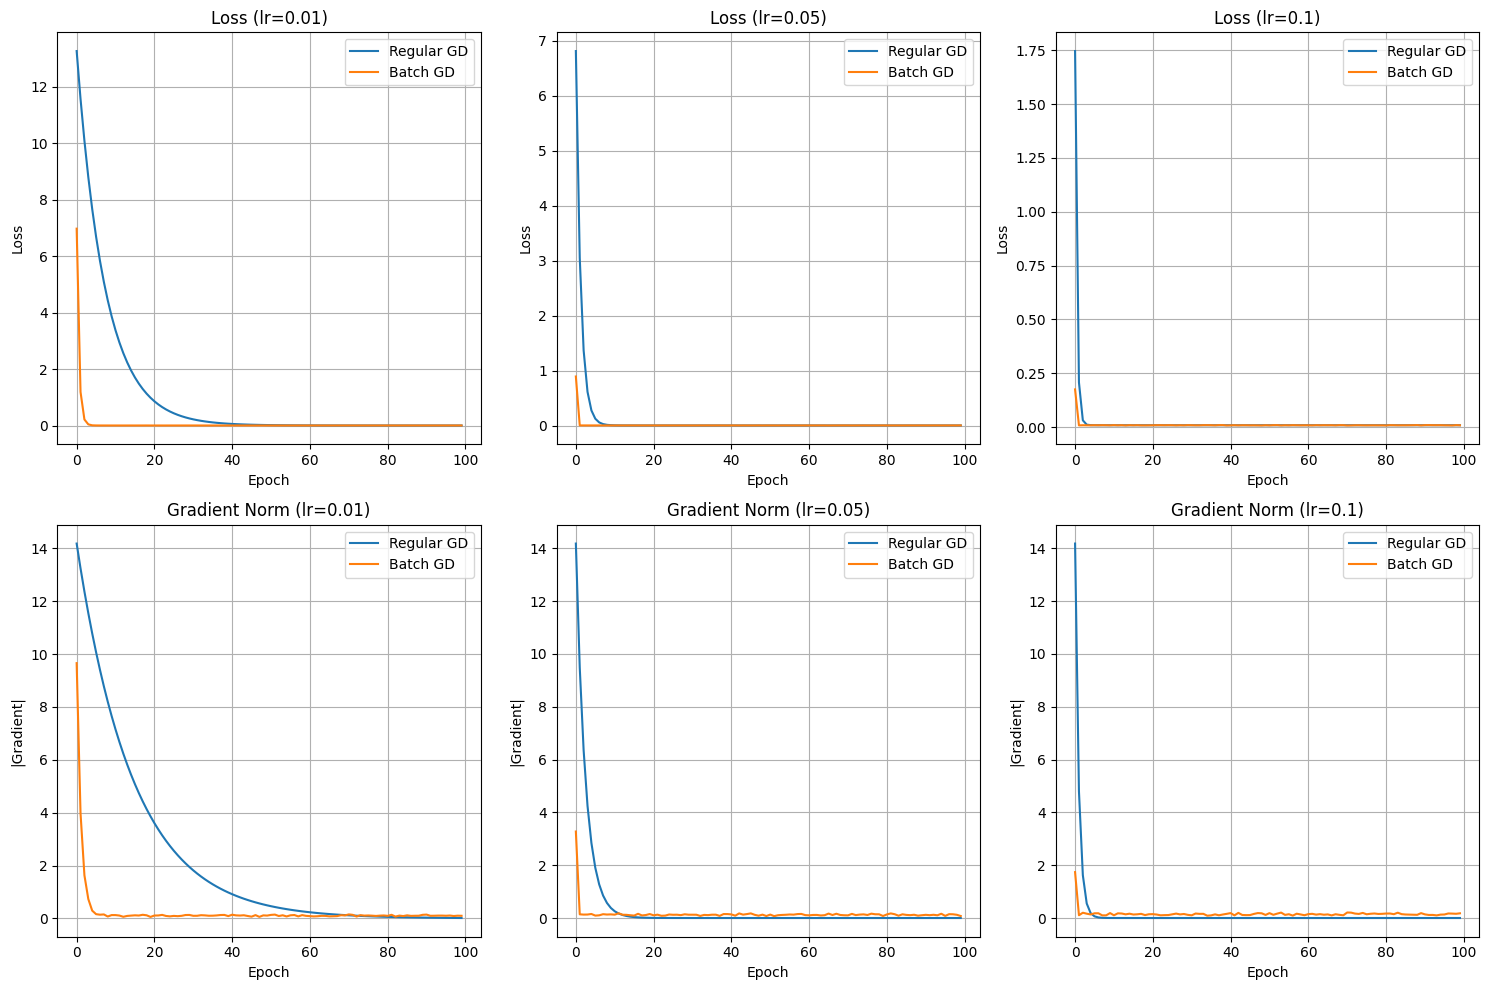

In [437]:

# Part B: Implement both GD variants
def compare_gd_variants(learning_rates=[0.01, 0.05, 0.1], epochs=100):
    X, y = generate_data(100)
    results = {}

    for lr in learning_rates:
        # Regular Gradient Descent
        w_gd = 0.35
        gd_losses = []
        gd_grads = []
        gd_weights = []

        for epoch in range(epochs):
            grad = calculate_gradient(X, y, w_gd)
            w_gd = w_gd - lr * grad
            loss = calculate_loss(X, y, w_gd)

            gd_losses.append(loss)
            gd_grads.append(np.abs(grad))
            gd_weights.append(w_gd)

        # Batch Gradient Descent
        w_bgd = 0.35
        bgd_losses = []
        bgd_grads = []
        bgd_weights = []

        for epoch in range(epochs):
            epoch_loss = 0
            epoch_grads = []

            for batch_X, batch_y in create_batches(X, y, batch_size=8):
                grad = calculate_gradient(batch_X, batch_y, w_bgd)
                w_bgd = w_bgd - lr * grad
                loss = calculate_loss(batch_X, batch_y, w_bgd)

                epoch_loss += loss
                epoch_grads.append(np.abs(grad))

            bgd_losses.append(epoch_loss / (len(X) // 8))
            bgd_grads.append(np.mean(epoch_grads))
            bgd_weights.append(w_bgd)

        results[lr] = {
            'gd': {'losses': gd_losses, 'grads': gd_grads, 'weights': gd_weights},
            'bgd': {'losses': bgd_losses, 'grads': bgd_grads, 'weights': bgd_weights}
        }

    # Plotting
    fig, axes = plt.subplots(2, len(learning_rates), figsize=(15, 10))

    for i, lr in enumerate(learning_rates):
        # Loss plot
        axes[0, i].plot(results[lr]['gd']['losses'], label='Regular GD')
        axes[0, i].plot(results[lr]['bgd']['losses'], label='Batch GD')
        axes[0, i].set_title(f'Loss (lr={lr})')
        axes[0, i].set_xlabel('Epoch')
        axes[0, i].set_ylabel('Loss')
        axes[0, i].legend()
        axes[0, i].grid(True)

        # Gradient norm plot
        axes[1, i].plot(results[lr]['gd']['grads'], label='Regular GD')
        axes[1, i].plot(results[lr]['bgd']['grads'], label='Batch GD')
        axes[1, i].set_title(f'Gradient Norm (lr={lr})')
        axes[1, i].set_xlabel('Epoch')
        axes[1, i].set_ylabel('|Gradient|')
        axes[1, i].legend()
        axes[1, i].grid(True)

    plt.tight_layout()
    return results

# Run the comparison
results_b = compare_gd_variants()

# Question 3

In [438]:
import pandas as pd
import numpy as np

# Install openpyxl if not already installed
!pip install openpyxl

def xlsx_to_dataframe(file_path):
  try:
    df = pd.read_excel(file_path, engine='openpyxl')  # Use openpyxl engine
    return df
  except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'")
    return None
  except Exception as e:
    print(f"An error occurred: {e}")
    return None

# Example usage
# file_path = 'https://raw.githubusercontent.com/amaydixit11/Academics/refs/heads/main/DSL251/HomeWork2/HW2Q3.csv'
file_path = '/content/DSAICourseInterestRelevanceSurvey.xlsx'
df = xlsx_to_dataframe(file_path)

if df is not None:

    try:
      cropped_df = df.iloc[0:24, 0:11] # Crop the DataFrame
      cropped_matrix = cropped_df.values # Convert to NumPy matrix
      print(cropped_matrix)

    except IndexError:
      print("Error: Cropping indices out of bounds. Check your DataFrame dimensions.")
    except Exception as e:
      print(f"An error occurred during cropping or matrix conversion: {e}")

[['Student 1' 4.0 3.0 4.0 1.0 1.0 1.0 4.0 5.0 5.0 5.0]
 ['Student 2' 3.0 3.0 3.0 1.0 1.0 1.0 4.0 5.0 5.0 5.0]
 ['Student 3' 4.0 4.0 3.0 3.0 4.0 2.0 4.0 5.0 4.0 nan]
 ['Student 4' 3.0 4.0 4.0 1.0 1.0 1.0 5.0 5.0 5.0 2.0]
 ['Student 5' 3.0 3.0 4.0 3.0 3.0 2.0 4.0 5.0 5.0 4.0]
 ['Student 6' 3.0 3.0 5.0 1.0 1.0 1.0 4.0 5.0 5.0 5.0]
 ['Student 7' 3.0 4.0 4.0 1.0 1.0 1.0 4.0 4.0 4.0 5.0]
 ['Student 8' 3.0 4.0 2.0 2.0 3.0 2.0 4.0 4.0 4.0 5.0]
 ['Student 9' 3.0 4.0 4.0 2.0 3.0 1.0 4.0 4.0 4.0 4.0]
 ['Student 10' 4.0 4.0 3.0 3.0 2.0 2.0 4.0 4.0 5.0 4.0]
 ['Student 11' 4.0 5.0 4.0 2.0 3.0 3.0 5.0 5.0 5.0 4.0]
 ['Student 12' 3.0 3.0 3.0 1.0 1.0 2.0 5.0 4.0 3.0 5.0]
 ['Student 13' 2.0 3.0 3.0 1.0 1.0 2.0 4.0 4.0 3.0 3.0]
 ['Student 14' 3.0 3.0 4.0 2.0 2.0 2.0 4.0 5.0 4.0 4.0]
 ['Student 15' 4.0 4.0 5.0 3.0 3.0 1.0 4.0 5.0 4.0 5.0]
 ['Student 16' 3.0 3.0 4.0 1.0 1.0 1.0 4.0 4.0 4.0 4.0]
 ['Student 17' 4.0 4.0 3.0 1.0 1.0 1.0 5.0 5.0 5.0 5.0]
 ['Student 18' 3.0 4.0 3.0 2.0 1.0 3.0 4.0 4.0 4.0 5.0]
 

In [439]:
#randomly suffle the student


if df is not None:
    try:
        # Crop the DataFrame (adjust indices as needed)
        cropped_df = df.iloc[0:24, 0:11]

        # Shuffle the DataFrame randomly
        shuffled_df = cropped_df.sample(frac=1).reset_index(drop=True)
        shuffled_df = shuffled_df.drop(columns=['Unnamed: 0'])
        # Display the shuffled DataFrame in tabular format
        print(shuffled_df)

    except IndexError:
        print("Error: Cropping indices out of bounds. Check your DataFrame dimensions.")
    except Exception as e:
        print(f"An error occurred during shuffling or display: {e}")

    MAL100  MAL101  MAL403  EEL101  ECL101  BML101  CSL100  CSL201  CSL202  \
0      4.0     3.0     4.0     1.0     1.0     1.0     4.0     5.0     5.0   
1      3.0     3.0     3.0     1.0     1.0     2.0     5.0     4.0     3.0   
2      4.0     4.0     3.0     3.0     2.0     2.0     4.0     4.0     5.0   
3      3.0     3.0     4.0     3.0     3.0     2.0     4.0     5.0     5.0   
4      3.0     5.0     5.0     2.0     1.0     1.0     4.0     4.0     4.0   
5      3.0     4.0     2.0     2.0     3.0     2.0     4.0     4.0     4.0   
6      3.0     3.0     4.0     1.0     1.0     1.0     4.0     4.0     4.0   
7      3.0     3.0     4.0     1.0     2.0     1.0     4.0     3.0     5.0   
8      4.0     5.0     5.0     1.0     1.0     2.0     4.0     1.0     5.0   
9      3.0     3.0     3.0     1.0     1.0     1.0     4.0     5.0     5.0   
10     1.0     5.0     3.0     1.0     1.0     2.0     1.0     5.0     4.0   
11     4.0     5.0     4.0     2.0     3.0     3.0     5.0     5

In [440]:
def replace_data(df, percentage):
    try:
        # Exclude first row and first column
        df_to_modify = df.iloc[:, 1:]

        total_cells = df_to_modify.size
        num_cells_to_replace = int(total_cells * (percentage / 100))

        # Generate random row and column indices for the modified DataFrame
        row_indices = np.random.choice(df_to_modify.index, size=num_cells_to_replace, replace=True)
        col_indices = np.random.choice(df_to_modify.columns, size=num_cells_to_replace, replace=True)

        # Replace values in the original DataFrame using the modified indices
        for row, col in zip(row_indices, col_indices):
              df.loc[row, col] = np.nan
        return df
    except (ValueError, TypeError):
        print("Error: Invalid input. Percentage must be a number between 0 and 100.")
        return df  # Return original DataFrame on error
    except Exception as e:
        print(f"An error occurred: {e}")
        return df

## Problem Statement: Missing Data Prediction and Analysis

You are provided with a dataset ([DSAICourseInterestRelevanceSurvey.xlsx](https://docs.google.com/spreadsheets/d/1oUyjxtFn_TmuQZkaJqEfISq4RTX9MVNuQUx2YbuMTHM/edit?gid=0#gid=0)) containing survey responses about student interest and courses. Your task is to simulate the scenario of missing data and build a model to predict those missing values.

Tasks:

Data Preprocessing:
Experiment with missing data percentages ranging from 20% to 80%.

Model Building:
Write a algorithms such that it predicts the missing values(e.g., Linear Regression).

Evaluation and Visualization:
Calculate the Mean Squared Error (MSE) to evaluate the accuracy of your predictions. The MSE measures the average squared difference between the actual and predicted values.
Create a plot to visualize the relationship between the actual and predicted values.

Mean Squared Error: 0.20833333333333334


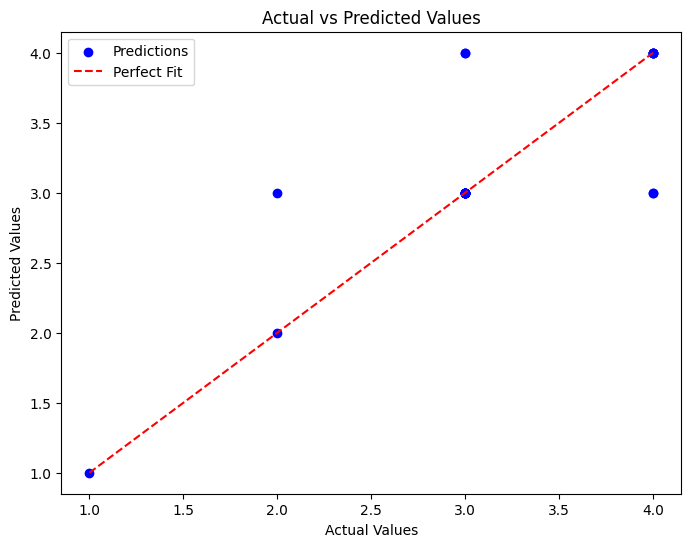

Mean Squared Error: 0.16666666666666666


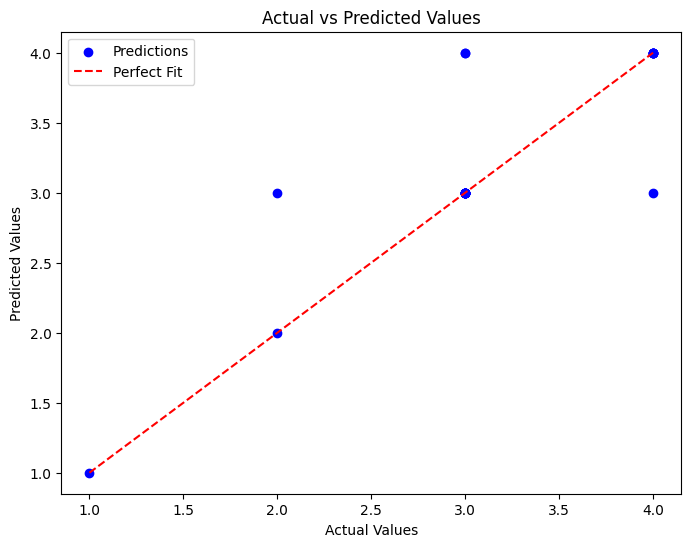

Mean Squared Error: 0.041666666666666664


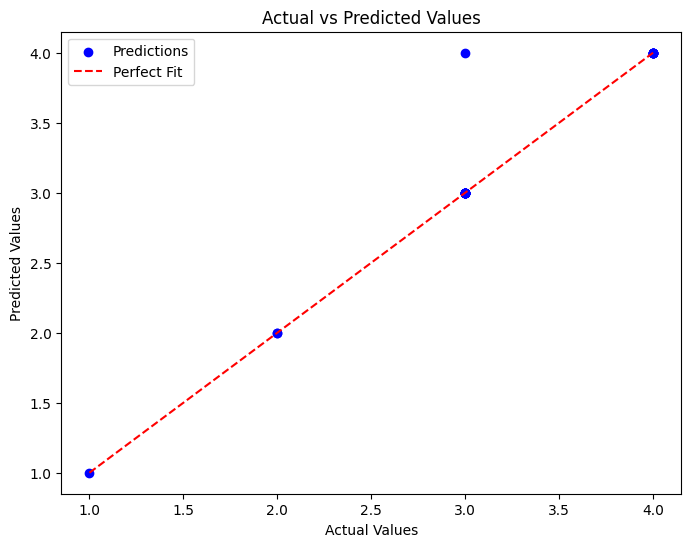

Mean Squared Error: 0.2916666666666667


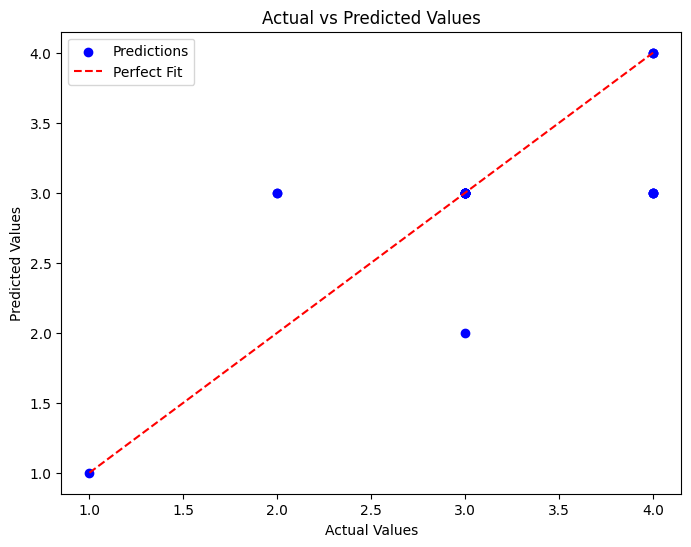

In [441]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer



df = shuffled_df.copy()
imputer = KNNImputer(n_neighbors=5)
df = imputer.fit_transform(df).round()
# print(df)
for percentage in [20, 40, 60, 80]:
    modified_df = replace_data(shuffled_df, percentage)

    # print(modified_df)
    # Step 3: imputation
    # imputer = SimpleImputer(strategy='mean')
    # modified_df = imputer.fit_transform(modified_df)
    imputer = KNNImputer(n_neighbors=5)
    modified_df = imputer.fit_transform(shuffled_df)

    # Step 4: Split data into features (X) and target (y) for prediction
    X = modified_df[:, 1:]
    y = df[:, 0]

    # Step 5: Train the Linear Regression Model
    model = LinearRegression()
    model.fit(X, y)

    predictions = model.predict(X).round()

    # Step 7: Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y, predictions)
    print(f'Mean Squared Error: {mse}')

    # Step 8: Plot the actual vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y, predictions, color='blue', label='Predictions')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Fit')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.legend()
    plt.show()